In [2]:
# Import the necessary libraries
import matplotlib.pyplot as plt
import networkx as nx

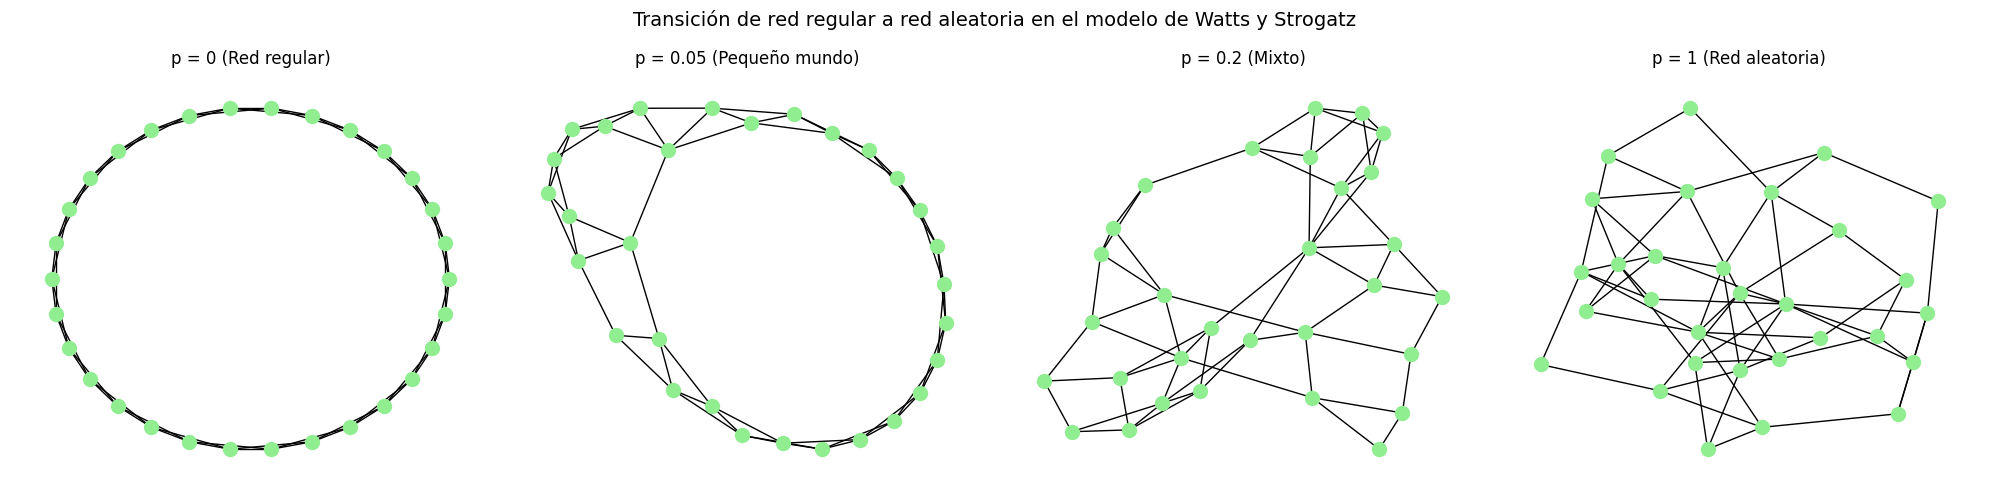

In [3]:
# Creamos y graficamos redes de Watts-Strogatz con distintos valores de p (probabilidad de reconexión)
fig, axs = plt.subplots(1, 4, figsize=(20, 5))
ps = [0, 0.05, 0.2, 1.0]
titles = [
    "p = 0 (Red regular)",
    "p = 0.05 (Pequeño mundo)",
    "p = 0.2 (Mixto)",
    "p = 1 (Red aleatoria)"
]

for i, p in enumerate(ps):
    G = nx.watts_strogatz_graph(n=30, k=4, p=p)
    pos = nx.circular_layout(G) if p == 0 else nx.spring_layout(G, seed=42)
    nx.draw(G, pos, ax=axs[i], node_size=100, node_color='lightgreen', with_labels=False)
    axs[i].set_title(titles[i])

plt.suptitle("Transición de red regular a red aleatoria en el modelo de Watts y Strogatz", fontsize=14)
plt.tight_layout()
plt.show()


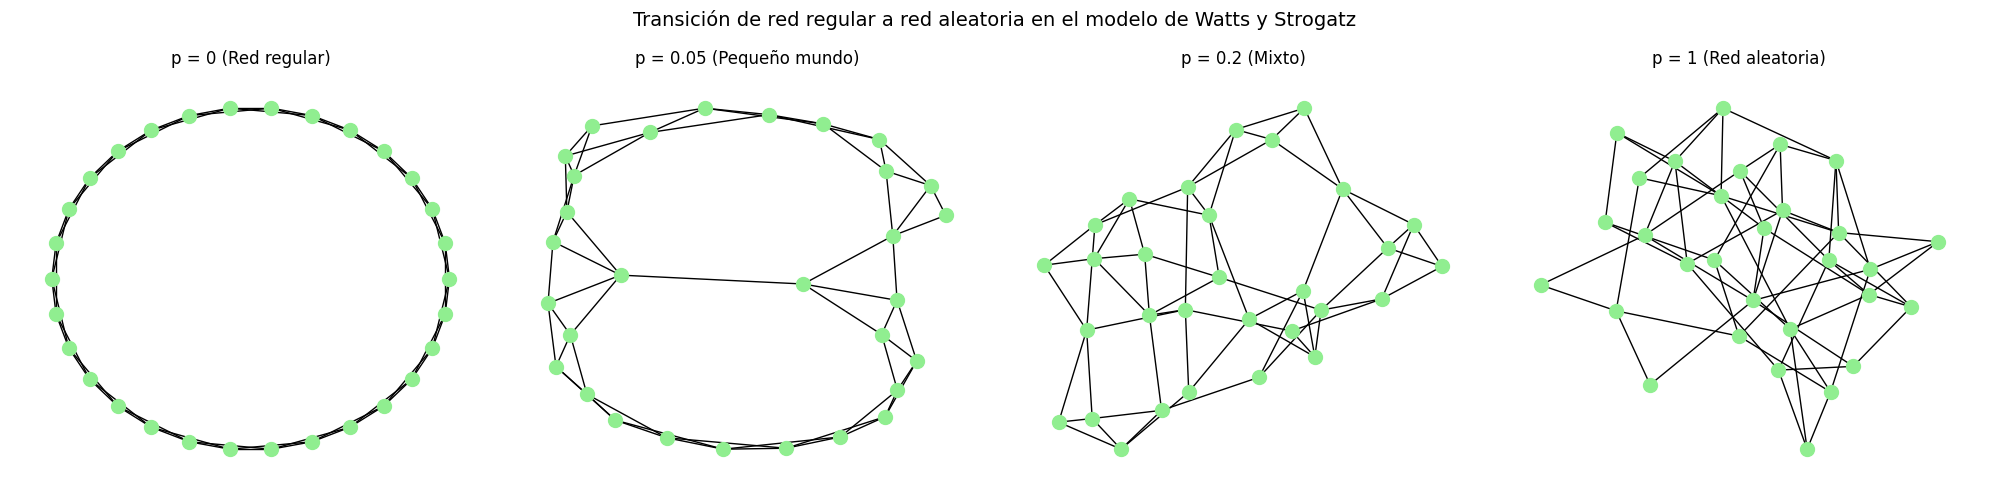

In [4]:
# Reimportar librerías tras reinicio
import networkx as nx
import matplotlib.pyplot as plt

# Crear y graficar redes de Watts-Strogatz con distintos valores de p
fig, axs = plt.subplots(1, 4, figsize=(20, 5))
ps = [0, 0.05, 0.2, 1.0]
titles = [
    "p = 0 (Red regular)",
    "p = 0.05 (Pequeño mundo)",
    "p = 0.2 (Mixto)",
    "p = 1 (Red aleatoria)"
]

for i, p in enumerate(ps):
    G = nx.watts_strogatz_graph(n=30, k=4, p=p)
    pos = nx.circular_layout(G) if p == 0 else nx.spring_layout(G, seed=42)
    nx.draw(G, pos, ax=axs[i], node_size=100, node_color='lightgreen', with_labels=False)
    axs[i].set_title(titles[i])

plt.suptitle("Transición de red regular a red aleatoria en el modelo de Watts y Strogatz", fontsize=14)
plt.tight_layout()
plt.show()


Red del gusano C elegance

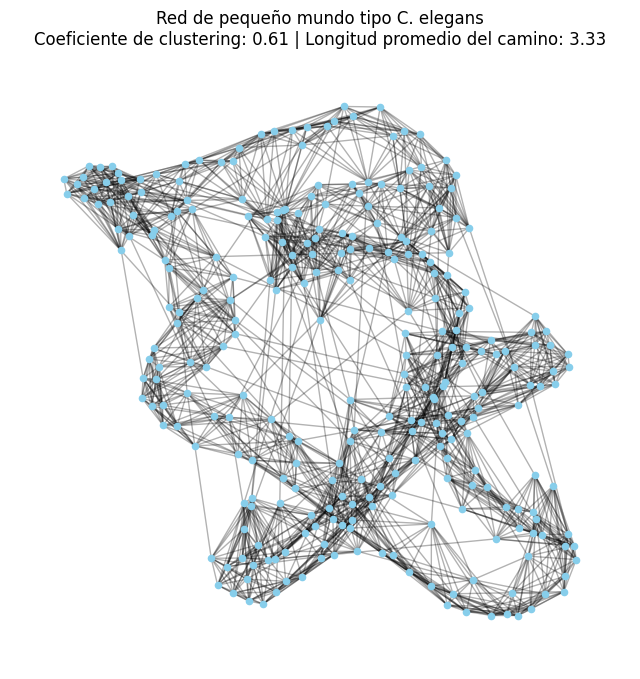

(0.6095015296204278, 3.326897352414124)

In [5]:
# Reimportar librerías tras el reinicio del entorno
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Crear un modelo de pequeño mundo similar al de C. elegans
n = 282  # número de nodos (neuronas)
k = 14   # conexiones por nodo
p = 0.05  # probabilidad de reconexión

# Crear el grafo de Watts-Strogatz
G = nx.watts_strogatz_graph(n, k, p)

# Calcular métricas
clustering = nx.average_clustering(G)
path_length = nx.average_shortest_path_length(G)

# Dibujar una parte del grafo
plt.figure(figsize=(8, 8))
pos = nx.spring_layout(G, seed=42)
nx.draw_networkx_nodes(G, pos, node_size=20, node_color='skyblue')
nx.draw_networkx_edges(G, pos, alpha=0.3)
plt.title("Red de pequeño mundo tipo C. elegans\n"
          f"Coeficiente de clustering: {clustering:.2f} | Longitud promedio del camino: {path_length:.2f}")
plt.axis('off')
plt.show()

(clustering, path_length)


## **Elección de los mejores parámetros**

In [6]:
import networkx as nx
import numpy as np

n = 100
valores_k = range(2, 10, 2)
valores_p = np.linspace(0, 1, 10)

mejor_p, mejor_k = None, None
mejor_score = -np.inf

for k in valores_k:
    for p in valores_p:
        G = nx.watts_strogatz_graph(n, k, p)
        C = nx.average_clustering(G)
        try:
            L = nx.average_shortest_path_length(G)
        except:
            continue  # por si la red no es conexa
        score = C / L  # queremos C alto y L bajo
        if score > mejor_score:
            mejor_score = score
            mejor_k, mejor_p = k, p

print(f"Mejor combinación: k={mejor_k}, p={mejor_p}, score={mejor_score}")


Mejor combinación: k=8, p=0.1111111111111111, score=0.1578679939611248


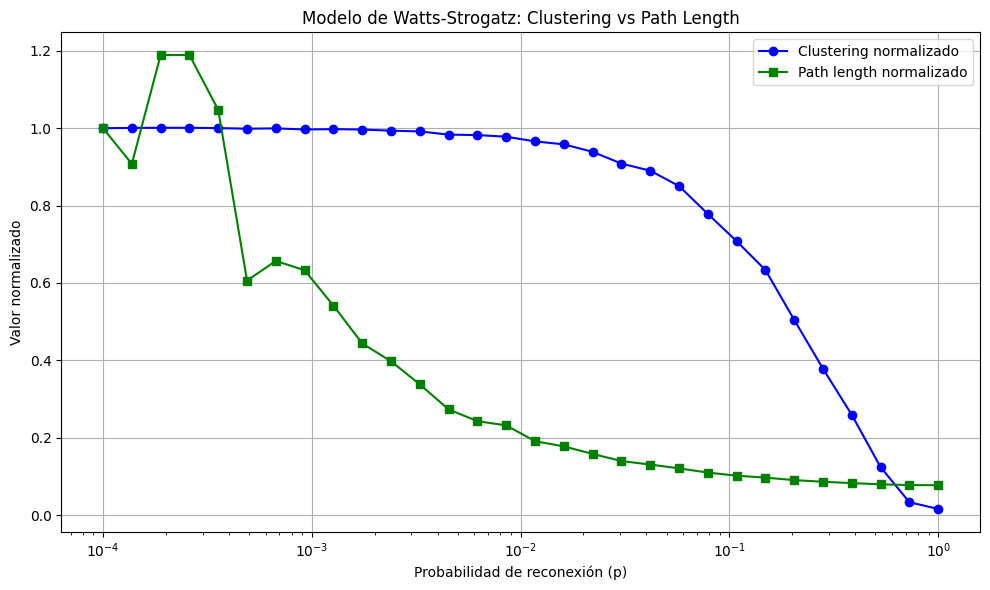

In [7]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Parámetros del grafo
n = 1000      # número de nodos
k = 10        # cada nodo se conecta con k vecinos más cercanos
p_values = np.logspace(-4, 0, 30)  # valores de p en escala logarítmica

clustering = []
path_lengths = []

for p in p_values:
    G = nx.watts_strogatz_graph(n, k, p)

    # Coeficiente de agrupamiento promedio
    C = nx.average_clustering(G)

    # Longitud media del camino más corto
    try:
        L = nx.average_shortest_path_length(G)
    except nx.NetworkXError:
        # Si el grafo no es conexo, ignoramos este valor
        L = np.nan

    clustering.append(C)
    path_lengths.append(L)

# Normalizamos los valores para comparar en la misma escala
C0 = clustering[0]
L0 = path_lengths[0]
clustering_norm = np.array(clustering) / C0
path_lengths_norm = np.array(path_lengths) / L0

# Graficamos
plt.figure(figsize=(10,6))
plt.plot(p_values, clustering_norm, 'o-', label='Clustering normalizado', color='blue')
plt.plot(p_values, path_lengths_norm, 's-', label='Path length normalizado', color='green')
plt.xscale('log')
plt.xlabel('Probabilidad de reconexión (p)')
plt.ylabel('Valor normalizado')
plt.title('Modelo de Watts-Strogatz: Clustering vs Path Length')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
